# Feature analysis and selection

In [18]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import sklearn.preprocessing as scale
import matplotlib.pyplot as plt

##### Load features

In [4]:
features_audio = np.load('output_ft.npy',allow_pickle=True)
class_names = np.load('output_cn.npy',allow_pickle=True)
file_names = np.load('output_fn.npy',allow_pickle=True)

In [11]:
features = np.concatenate((features_audio[0],  features_audio[1],  features_audio[2]))
features_norm = scale.minmax_scale(features)
features_norm.shape

(4368, 136)

In [23]:
features_var = np.var(features_norm, axis=0)
features_var.shape

(136,)

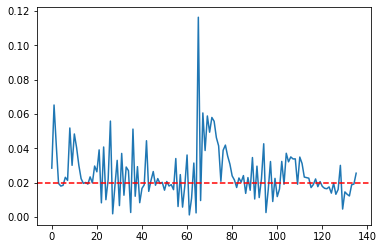

In [41]:
plt.plot(features_var);
threshold=0.020
plt.axhline(y = threshold, color = 'r', linestyle = 'dashed')
plt.show()

In [30]:
sel = VarianceThreshold(threshold=0.035)
features_reduct = sel.fit_transform(features_norm)
features_reduct.shape

(4368, 27)

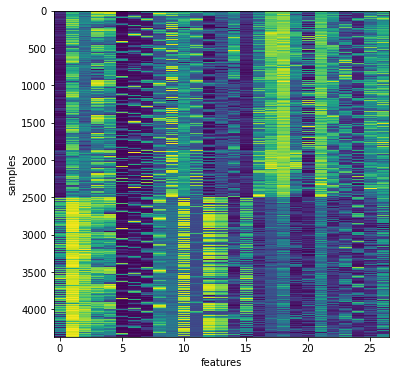

In [39]:
plt.figure(figsize=(6, 6))
plt.imshow(features_reduct,interpolation='none')
plt.xlabel('features')
plt.ylabel('samples')
plt.axis('auto')
plt.show()